# Lab Program 7 | SVM on MNIST Dataset
## Implement an SVM classifier to classify handwritten digits using the MNIST dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
# Step 1: Load the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

In [ ]:
# Convert labels to integers
y = y.astype(int)

In [ ]:
# Step 2: Preprocess the data (scale pixel values to [0, 1])
X = X / 255.0

In [ ]:
# Step 3: Train-Test Split (Use a subset for faster training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 4: Train the SVM Model
# Using a subset of the training data for faster execution
subset = 5000  # Use only 5000 samples for training (adjust for more data)
svm_model = SVC(kernel='rbf', C=5, gamma=0.05)  # Radial Basis Function kernel
svm_model.fit(X_train[:subset], y_train[:subset])

SVC(C=5, gamma=0.05)

In [ ]:
# Step 5: Evaluate the Model
y_pred = svm_model.predict(X_test)

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.33%


In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1343
           1       0.99      0.98      0.98      1600
           2       0.89      0.97      0.93      1380
           3       0.93      0.94      0.93      1433
           4       0.96      0.95      0.95      1295
           5       0.95      0.95      0.95      1273
           6       0.98      0.96      0.97      1396
           7       0.97      0.95      0.96      1503
           8       0.95      0.93      0.94      1357
           9       0.94      0.92      0.93      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1318    1    8    0    1    2    5    1    6    1]
 [   0 1568    6    7    2    4    0    2    6    5]
 [   2    3 1342    3    8    3    4    5    9    1]
 [   1    0   27 1345    0   22    2    9   18    9]
 [   2    2   18    2 1229    0    6    2    4   30]
 [   5    1   10   34    4 1203    5    0    9    2]
 [  11    2   17    0    7   12 1342    0    5    0]
 [   3    6   24    1    8    3    0 1428    4   26]
 [   3    4   26   36    2   11    3    5 1262    5]
 [   9    4   27   19   20    7    0   13   12 1309]]


In [ ]:
# Function to plot samples with predictions
def plot_samples(X, y_true, y_pred, n_samples=10):
    plt.figure(figsize=(10, 2))
    for i in range(n_samples):
        plt.subplot(1, n_samples, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')  # Ensure X is in the correct shape
        plt.title(f"True: {y_true[i]}\nPred: {y_pred[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
# Ensure X_test, y_test, and y_pred are NumPy arrays
if isinstance(X_test, pd.DataFrame) or isinstance(X_test, pd.Series):
    X_test = X_test.values
if isinstance(y_test, pd.Series):
    y_test = y_test.values
if isinstance(y_pred, pd.Series):
    y_pred = y_pred.values

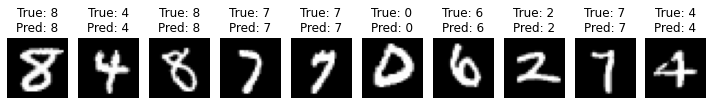

In [ ]:
# Plot 10 random predictions from the test set
plot_samples(X_test[:10], y_test[:10], y_pred[:10])